In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 버젼 2. tensorflow 라면 아래 코드 필요
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.2.0'

In [5]:
def graph(w_number, x_number, step_number):
    y = 1
    yprime = 0
    x = tf.Variable(tf.random_uniform([x_number], minval = -1, maxval = 1), name = 'x')
    
    for i in range(1, w_number + 1):
        globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
        y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
        yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    
    cost = tf.reduce_mean(tf.square(yprime - y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
    train = optimizer.minimize(cost)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_number + 1):
        for i in range(1, w_number + 1):
            globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
        cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
        if step % int(step_number / 5) == 0:
    #         print(step, "Cost: ", cost_val, "\nx: ", x_val,  "yprime: ", yprime_val, "y: ", y_val)
            print(step, "Cost: ", cost_val, "\n")
            print("w1: ", w1_val, "w2: ", w2_val, "w3: ", w3_val, "w4: ", w4_val, "w5: ", w5_val, "w6: ", w6_val, "\n")
            
    def y(x):
        answer = 1
        for i in range(1, w_number + 1):
            answer += globals()['w{}_val'.format(i)]*(x**i)
        return answer[0]
    
    globals()['w{}x{}'.format(w_number, x_number)] = [x_val, y(x_val)]
    plt.plot(x_val, y(x_val), '.')
    plt.show()

0 Cost:  16.572618 

w1:  [array([0.9757669], dtype=float32)] w2:  [array([-1.1399046], dtype=float32)] w3:  [array([0.3378033], dtype=float32)] w4:  [array([-0.18537572], dtype=float32)] w5:  [array([-0.38110355], dtype=float32)] w6:  [array([-1.2685349], dtype=float32)] 

6000 Cost:  3.4929895 

w1:  [array([0.8268331], dtype=float32)] w2:  [array([-0.8234293], dtype=float32)] w3:  [array([0.26955947], dtype=float32)] w4:  [array([0.1767357], dtype=float32)] w5:  [array([-0.41473633], dtype=float32)] w6:  [array([-0.9247006], dtype=float32)] 

12000 Cost:  1.6692122 

w1:  [array([0.7610029], dtype=float32)] w2:  [array([-0.6468256], dtype=float32)] w3:  [array([0.26009554], dtype=float32)] w4:  [array([0.35023224], dtype=float32)] w5:  [array([-0.40544638], dtype=float32)] w6:  [array([-0.78602403], dtype=float32)] 

18000 Cost:  0.95680183 

w1:  [array([0.7267375], dtype=float32)] w2:  [array([-0.5240517], dtype=float32)] w3:  [array([0.26416922], dtype=float32)] w4:  [array([0.46

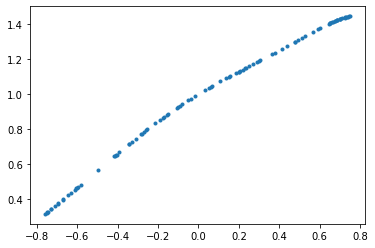

In [6]:
graph(6, 100, 30000)

0 Cost:  45.968662 

w1:  [array([0.286876], dtype=float32)] w2:  [array([0.59884983], dtype=float32)] w3:  [array([-0.8428805], dtype=float32)] w4:  [array([-2.5629635], dtype=float32)] w5:  [array([1.0479623], dtype=float32)] w6:  [array([-1.8013939], dtype=float32)] 

6000 Cost:  8.623036 

w1:  [array([0.14100426], dtype=float32)] w2:  [array([1.0528642], dtype=float32)] w3:  [array([-0.9534335], dtype=float32)] w4:  [array([-1.8978672], dtype=float32)] w5:  [array([0.9655012], dtype=float32)] w6:  [array([-1.056878], dtype=float32)] 

12000 Cost:  3.9360347 

w1:  [array([0.15619086], dtype=float32)] w2:  [array([1.2357217], dtype=float32)] w3:  [array([-0.9091902], dtype=float32)] w4:  [array([-1.6046711], dtype=float32)] w5:  [array([1.0275848], dtype=float32)] w6:  [array([-0.73756397], dtype=float32)] 

18000 Cost:  2.3251388 

w1:  [array([0.21219602], dtype=float32)] w2:  [array([1.3266512], dtype=float32)] w3:  [array([-0.846307], dtype=float32)] w4:  [array([-1.4331313], d

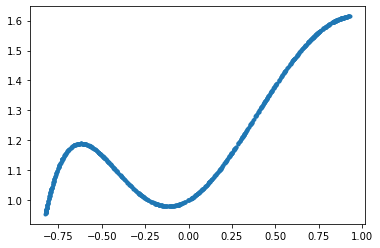

In [7]:
graph(6, 1000, 30000)

0 Cost:  8.698483 

w1:  [array([-0.2858754], dtype=float32)] w2:  [array([1.1449072], dtype=float32)] w3:  [array([0.19669302], dtype=float32)] w4:  [array([-1.429263], dtype=float32)] w5:  [array([-1.1930232], dtype=float32)] w6:  [array([-0.27972612], dtype=float32)] 

6000 Cost:  3.9613593 

w1:  [array([-0.10053354], dtype=float32)] w2:  [array([1.1269188], dtype=float32)] w3:  [array([0.48266944], dtype=float32)] w4:  [array([-1.3278326], dtype=float32)] w5:  [array([-0.84813154], dtype=float32)] w6:  [array([-0.10902978], dtype=float32)] 

12000 Cost:  1.9938992 

w1:  [array([0.02291407], dtype=float32)] w2:  [array([1.1294798], dtype=float32)] w3:  [array([0.65295696], dtype=float32)] w4:  [array([-1.2331353], dtype=float32)] w5:  [array([-0.6463746], dtype=float32)] w6:  [array([0.03805629], dtype=float32)] 

18000 Cost:  1.0988297 

w1:  [array([0.11425038], dtype=float32)] w2:  [array([1.1329465], dtype=float32)] w3:  [array([0.7593666], dtype=float32)] w4:  [array([-1.1592

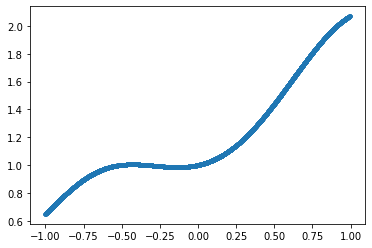

In [8]:
graph(6, 10000, 30000)

0 Cost:  10.856895 

w1:  [array([-0.28182435], dtype=float32)] w2:  [array([-1.6635908], dtype=float32)] w3:  [array([-0.68282914], dtype=float32)] w4:  [array([-0.359197], dtype=float32)] w5:  [array([0.7466556], dtype=float32)] w6:  [array([-0.5150819], dtype=float32)] 

6000 Cost:  3.3354273 

w1:  [array([-0.32840458], dtype=float32)] w2:  [array([-1.3831959], dtype=float32)] w3:  [array([-0.75879085], dtype=float32)] w4:  [array([0.01685216], dtype=float32)] w5:  [array([0.64714074], dtype=float32)] w6:  [array([-0.09141795], dtype=float32)] 

12000 Cost:  1.967614 

w1:  [array([-0.28225395], dtype=float32)] w2:  [array([-1.2575058], dtype=float32)] w3:  [array([-0.7363782], dtype=float32)] w4:  [array([0.18190083], dtype=float32)] w5:  [array([0.6485379], dtype=float32)] w6:  [array([0.08822282], dtype=float32)] 

18000 Cost:  1.5293171 

w1:  [array([-0.2125475], dtype=float32)] w2:  [array([-1.1876906], dtype=float32)] w3:  [array([-0.694717], dtype=float32)] w4:  [array([0.2

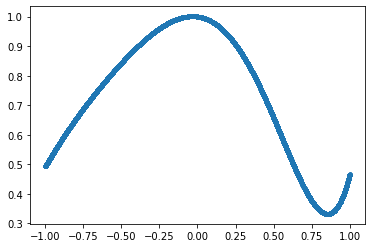

In [11]:
graph(6, 100000, 30000)

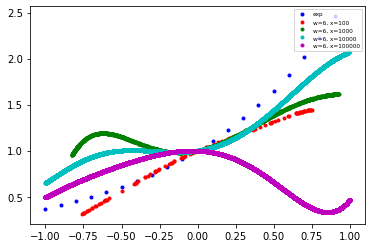

In [17]:
x = np.array([i for i in range(-10, 10, 1)])
plt.plot(0.1*x, np.exp(0.1*x), '.b', label = 'exp')
plt.plot(w6x100[0],w6x100[1], '.r', label = 'w=6, x=100')
plt.plot(w6x1000[0],w6x1000[1], '.g', label = 'w=6, x=1000')
plt.plot(w6x10000[0],w6x10000[1], '.c', label = 'w=6, x=10000')
plt.plot(w6x100000[0],w6x100000[1], '.m', label = 'w=6, x=100000')
plt.legend(loc = 'upper right', fontsize = 'xx-small')

plt.show()